# General EDA

We start the data exploration by retrieving some general facts about the cleaned data.

TODO:
- interprete the results
- choose a few of the things

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
df = pd.read_csv('../clean_data/cleaned_data.csv')
df.head()

,company,date,Ticker,followers,pictures,videos,comments,likes,compset_group_Beauty & Personal Care,compset_group_Food & Beverages,compset_group_Home Improvement & Appliances,compset_group_Luxury & Premium & Mainstream & Entertainment,compset_group_Retail
0,AbbVie,7/24/21,ABBV,5477,3,4,0,180,1,0,0,0,0
1,AbbVie,7/31/21,ABBV,5761,5,4,0,246,1,0,0,0,0
2,AbbVie,8/7/21,ABBV,5933,5,3,0,222,1,0,0,0,0
3,AbbVie,8/14/21,ABBV,6104,5,3,0,252,1,0,0,0,0
4,AbbVie,8/21/21,ABBV,6354,5,2,0,248,1,0,0,0,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75033 entries, 0 to 75032
Data columns (total 13 columns):
 #   Column                                                       Non-Null Count  Dtype         
---  ------                                                       --------------  -----         
 0   company                                                      75033 non-null  object        
 1   date                                                         75033 non-null  datetime64[ns]
 2   Ticker                                                       75033 non-null  object        
 3   followers                                                    75033 non-null  int64         
 4   pictures                                                     75033 non-null  int64         
 5   videos                                                       75033 non-null  int64         
 6   comments                                                     75033 non-null  int64         
 7   likes        

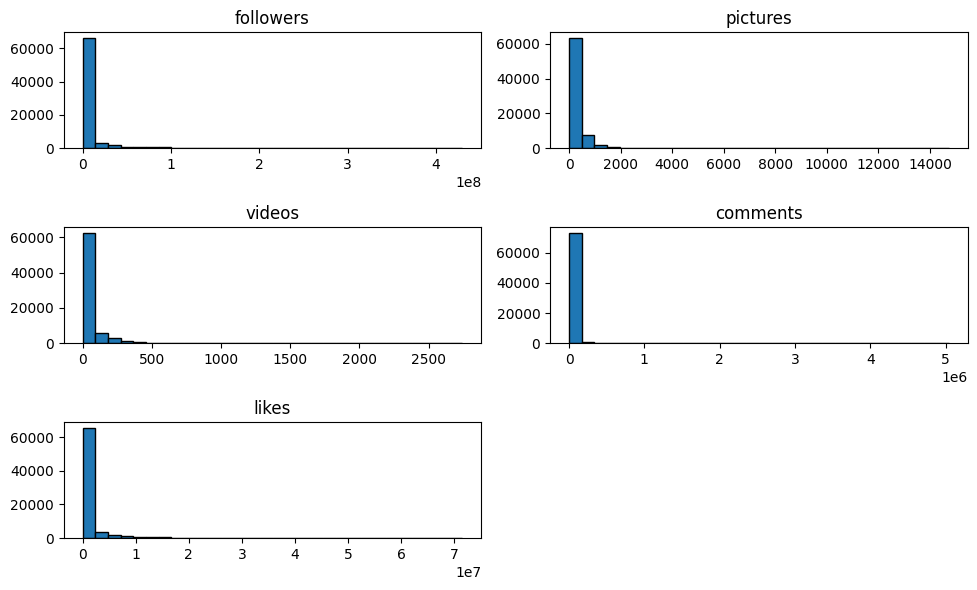

In [51]:
# Histograms for numerical data with multiple bins in log scale with space between bars
# plot the numerical values and not scientific notation on x axis
engagement_features = ['followers', 'pictures', 'videos', 'comments', 'likes']
df[engagement_features].hist(bins=30, log=False, grid=False, edgecolor='black', figsize=(10, 6))
plt.tight_layout()
plt.show()

/var/folders/05/z6mtxwt90_7_xdbfz4zyq8j80000gn/T/ipykernel_82161/2719281734.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


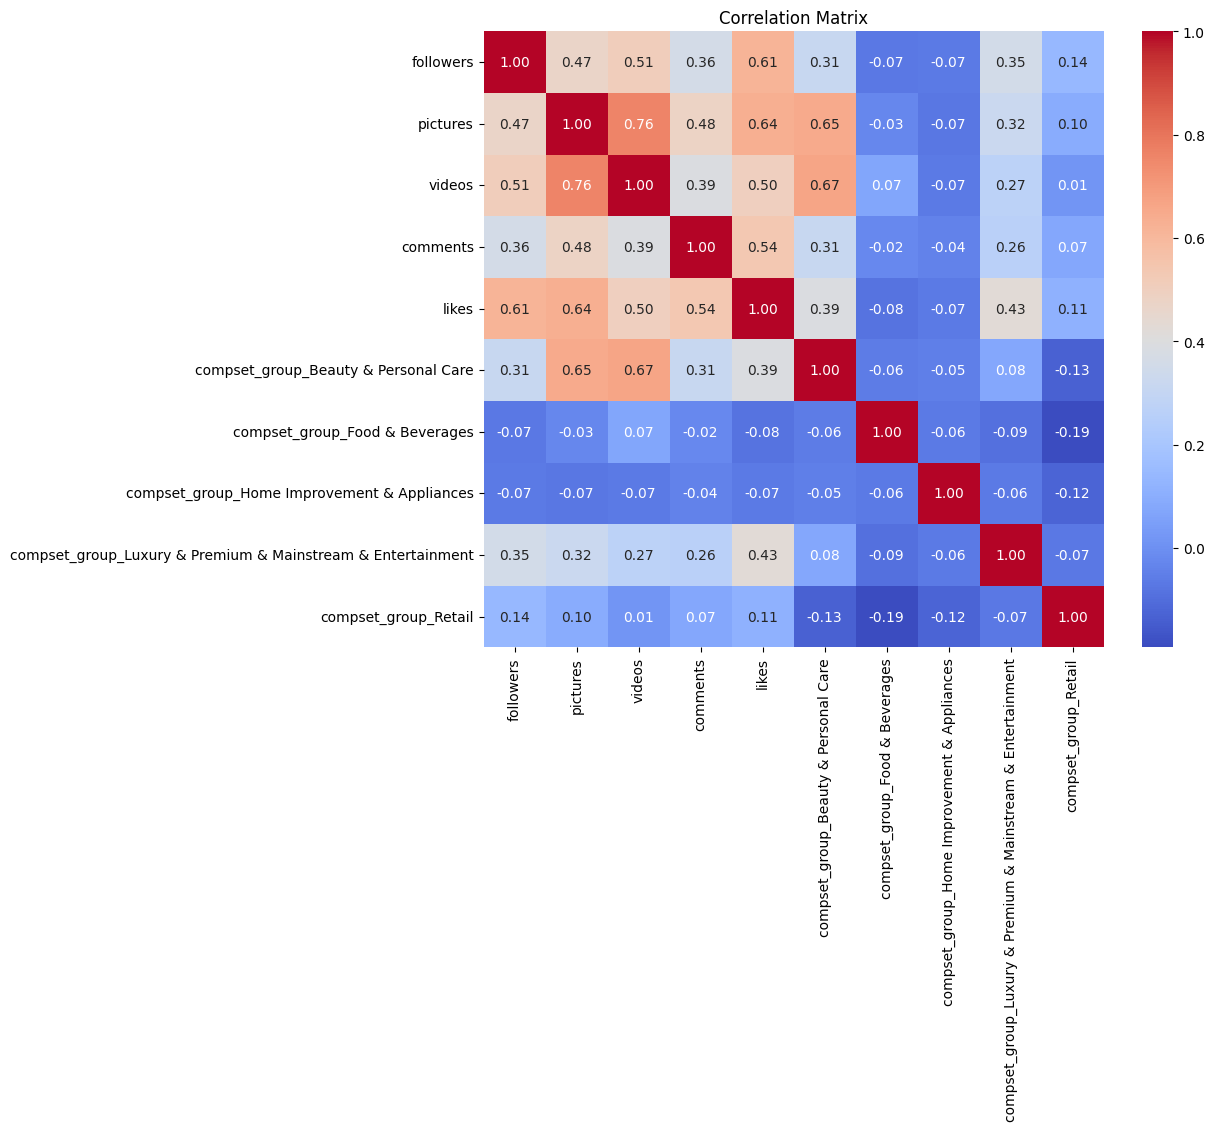

In [34]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

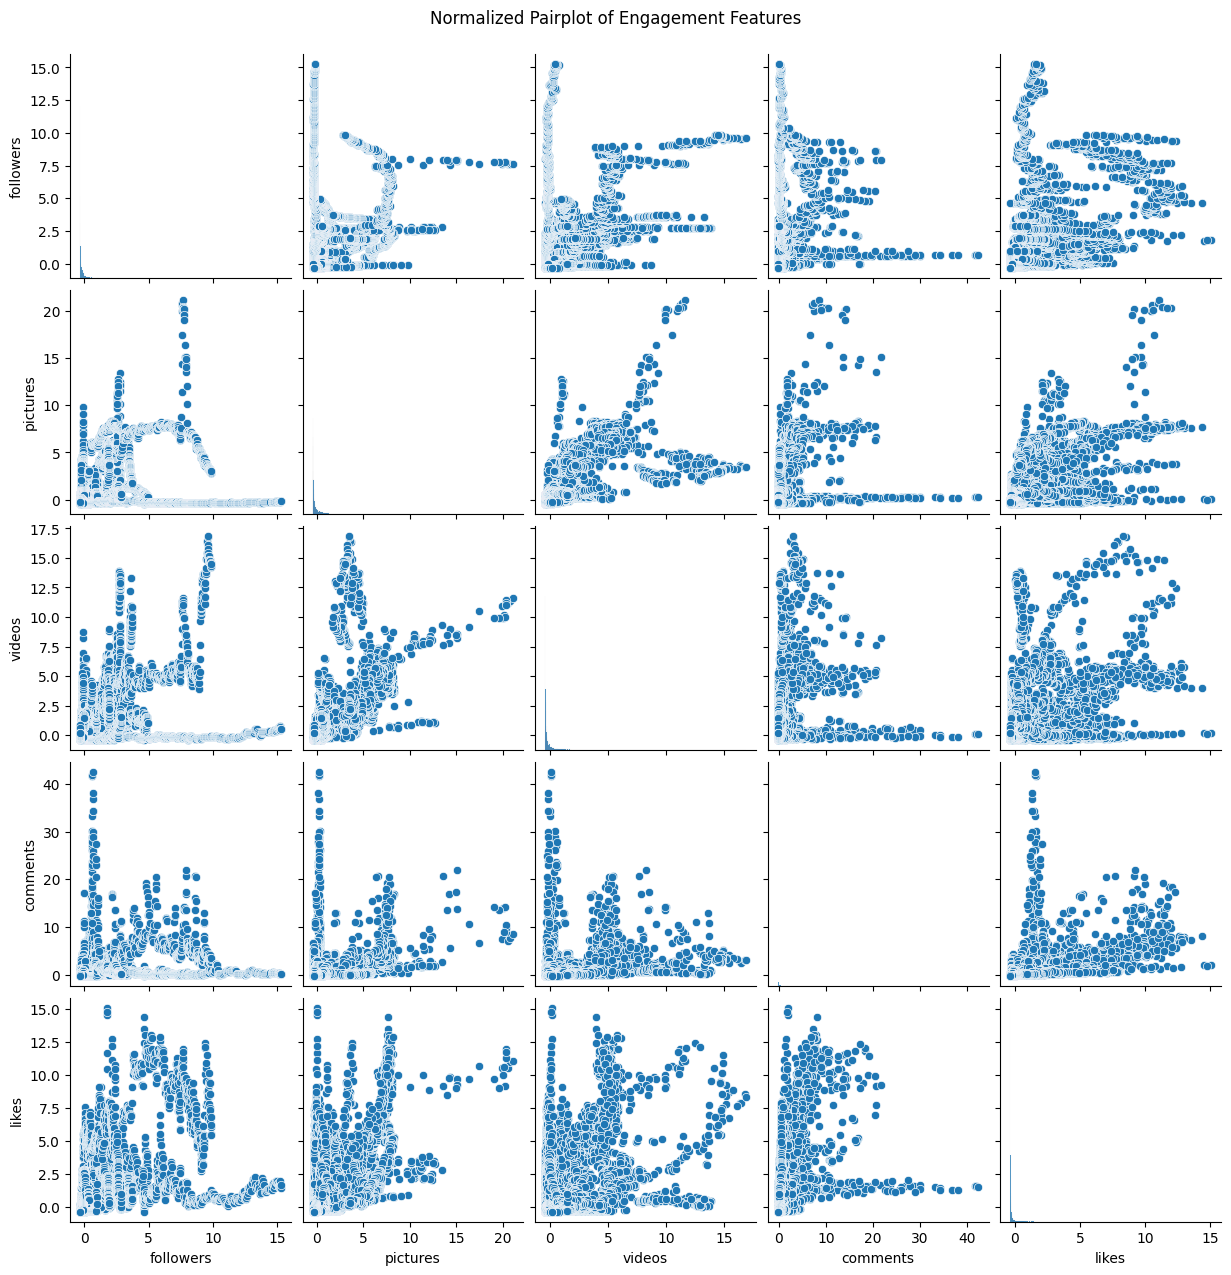

In [47]:
from sklearn.preprocessing import StandardScaler

# List of engagement features
engagement_features = ['followers', 'pictures', 'videos', 'comments', 'likes']

# Extract the subset of the DataFrame to normalize
df_subset = df[engagement_features]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_normalized = pd.DataFrame(scaler.fit_transform(df_subset), columns=engagement_features)

# Create a pairplot of the normalized engagement features
sns.pairplot(df_normalized)
plt.suptitle('Normalized Pairplot of Engagement Features', y=1.02)
plt.show()